# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

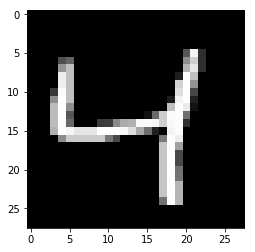

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output') 

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.01).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6628
Epoch: 1/20... Training loss: 0.6091
Epoch: 1/20... Training loss: 0.5257
Epoch: 1/20... Training loss: 0.4428
Epoch: 1/20... Training loss: 0.3751
Epoch: 1/20... Training loss: 0.3447
Epoch: 1/20... Training loss: 0.3218
Epoch: 1/20... Training loss: 0.3082
Epoch: 1/20... Training loss: 0.3025
Epoch: 1/20... Training loss: 0.2948
Epoch: 1/20... Training loss: 0.3012
Epoch: 1/20... Training loss: 0.2983
Epoch: 1/20... Training loss: 0.2951
Epoch: 1/20... Training loss: 0.2931
Epoch: 1/20... Training loss: 0.2809
Epoch: 1/20... Training loss: 0.2773
Epoch: 1/20... Training loss: 0.2788
Epoch: 1/20... Training loss: 0.2714
Epoch: 1/20... Training loss: 0.2752
Epoch: 1/20... Training loss: 0.2651
Epoch: 1/20... Training loss: 0.2629
Epoch: 1/20... Training loss: 0.2612
Epoch: 1/20... Training loss: 0.2671
Epoch: 1/20... Training loss: 0.2476
Epoch: 1/20... Training loss: 0.2488
Epoch: 1/20... Training loss: 0.2487
E

Epoch: 1/20... Training loss: 0.1531
Epoch: 1/20... Training loss: 0.1480
Epoch: 1/20... Training loss: 0.1516
Epoch: 1/20... Training loss: 0.1484
Epoch: 1/20... Training loss: 0.1583
Epoch: 1/20... Training loss: 0.1534
Epoch: 1/20... Training loss: 0.1473
Epoch: 1/20... Training loss: 0.1517
Epoch: 1/20... Training loss: 0.1486
Epoch: 1/20... Training loss: 0.1541
Epoch: 1/20... Training loss: 0.1522
Epoch: 1/20... Training loss: 0.1539
Epoch: 1/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1518
E

Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1408
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1400
Epoch: 2/20... Training loss: 0.1457
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1455
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1424
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1391
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1450
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1462
E

Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1460
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1459
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1453
Epoch: 3/20... Training loss: 0.1413
E

Epoch: 4/20... Training loss: 0.1452
Epoch: 4/20... Training loss: 0.1401
Epoch: 4/20... Training loss: 0.1411
Epoch: 4/20... Training loss: 0.1389
Epoch: 4/20... Training loss: 0.1387
Epoch: 4/20... Training loss: 0.1407
Epoch: 4/20... Training loss: 0.1353
Epoch: 4/20... Training loss: 0.1408
Epoch: 4/20... Training loss: 0.1449
Epoch: 4/20... Training loss: 0.1363
Epoch: 4/20... Training loss: 0.1395
Epoch: 4/20... Training loss: 0.1363
Epoch: 4/20... Training loss: 0.1443
Epoch: 4/20... Training loss: 0.1467
Epoch: 4/20... Training loss: 0.1402
Epoch: 4/20... Training loss: 0.1446
Epoch: 4/20... Training loss: 0.1359
Epoch: 4/20... Training loss: 0.1437
Epoch: 4/20... Training loss: 0.1418
Epoch: 4/20... Training loss: 0.1482
Epoch: 4/20... Training loss: 0.1404
Epoch: 4/20... Training loss: 0.1409
Epoch: 4/20... Training loss: 0.1437
Epoch: 4/20... Training loss: 0.1426
Epoch: 4/20... Training loss: 0.1469
Epoch: 4/20... Training loss: 0.1462
Epoch: 4/20... Training loss: 0.1344
E

Epoch: 5/20... Training loss: 0.1493
Epoch: 5/20... Training loss: 0.1423
Epoch: 5/20... Training loss: 0.1406
Epoch: 5/20... Training loss: 0.1426
Epoch: 5/20... Training loss: 0.1416
Epoch: 5/20... Training loss: 0.1367
Epoch: 5/20... Training loss: 0.1428
Epoch: 5/20... Training loss: 0.1397
Epoch: 5/20... Training loss: 0.1418
Epoch: 5/20... Training loss: 0.1423
Epoch: 5/20... Training loss: 0.1411
Epoch: 5/20... Training loss: 0.1433
Epoch: 5/20... Training loss: 0.1338
Epoch: 5/20... Training loss: 0.1411
Epoch: 5/20... Training loss: 0.1403
Epoch: 5/20... Training loss: 0.1435
Epoch: 5/20... Training loss: 0.1379
Epoch: 5/20... Training loss: 0.1366
Epoch: 5/20... Training loss: 0.1421
Epoch: 5/20... Training loss: 0.1457
Epoch: 5/20... Training loss: 0.1437
Epoch: 5/20... Training loss: 0.1395
Epoch: 5/20... Training loss: 0.1407
Epoch: 5/20... Training loss: 0.1450
Epoch: 5/20... Training loss: 0.1468
Epoch: 5/20... Training loss: 0.1416
Epoch: 5/20... Training loss: 0.1385
E

Epoch: 6/20... Training loss: 0.1388
Epoch: 6/20... Training loss: 0.1426
Epoch: 6/20... Training loss: 0.1431
Epoch: 6/20... Training loss: 0.1391
Epoch: 6/20... Training loss: 0.1444
Epoch: 6/20... Training loss: 0.1431
Epoch: 6/20... Training loss: 0.1421
Epoch: 6/20... Training loss: 0.1348
Epoch: 6/20... Training loss: 0.1414
Epoch: 6/20... Training loss: 0.1423
Epoch: 6/20... Training loss: 0.1410
Epoch: 6/20... Training loss: 0.1394
Epoch: 6/20... Training loss: 0.1377
Epoch: 6/20... Training loss: 0.1423
Epoch: 6/20... Training loss: 0.1451
Epoch: 6/20... Training loss: 0.1429
Epoch: 6/20... Training loss: 0.1402
Epoch: 6/20... Training loss: 0.1371
Epoch: 6/20... Training loss: 0.1408
Epoch: 6/20... Training loss: 0.1403
Epoch: 6/20... Training loss: 0.1427
Epoch: 6/20... Training loss: 0.1425
Epoch: 6/20... Training loss: 0.1360
Epoch: 6/20... Training loss: 0.1418
Epoch: 6/20... Training loss: 0.1443
Epoch: 6/20... Training loss: 0.1416
Epoch: 6/20... Training loss: 0.1419
E

Epoch: 7/20... Training loss: 0.1374
Epoch: 7/20... Training loss: 0.1339
Epoch: 7/20... Training loss: 0.1442
Epoch: 7/20... Training loss: 0.1401
Epoch: 7/20... Training loss: 0.1383
Epoch: 7/20... Training loss: 0.1408
Epoch: 7/20... Training loss: 0.1425
Epoch: 7/20... Training loss: 0.1408
Epoch: 7/20... Training loss: 0.1378
Epoch: 7/20... Training loss: 0.1414
Epoch: 7/20... Training loss: 0.1417
Epoch: 7/20... Training loss: 0.1362
Epoch: 7/20... Training loss: 0.1410
Epoch: 7/20... Training loss: 0.1404
Epoch: 7/20... Training loss: 0.1427
Epoch: 7/20... Training loss: 0.1426
Epoch: 7/20... Training loss: 0.1421
Epoch: 7/20... Training loss: 0.1361
Epoch: 7/20... Training loss: 0.1389
Epoch: 7/20... Training loss: 0.1373
Epoch: 7/20... Training loss: 0.1393
Epoch: 7/20... Training loss: 0.1427
Epoch: 7/20... Training loss: 0.1406
Epoch: 7/20... Training loss: 0.1423
Epoch: 7/20... Training loss: 0.1422
Epoch: 7/20... Training loss: 0.1466
Epoch: 7/20... Training loss: 0.1395
E

Epoch: 8/20... Training loss: 0.1419
Epoch: 8/20... Training loss: 0.1397
Epoch: 8/20... Training loss: 0.1405
Epoch: 8/20... Training loss: 0.1374
Epoch: 8/20... Training loss: 0.1418
Epoch: 8/20... Training loss: 0.1444
Epoch: 8/20... Training loss: 0.1430
Epoch: 8/20... Training loss: 0.1422
Epoch: 8/20... Training loss: 0.1426
Epoch: 8/20... Training loss: 0.1374
Epoch: 8/20... Training loss: 0.1395
Epoch: 8/20... Training loss: 0.1366
Epoch: 8/20... Training loss: 0.1387
Epoch: 8/20... Training loss: 0.1357
Epoch: 8/20... Training loss: 0.1387
Epoch: 8/20... Training loss: 0.1382
Epoch: 8/20... Training loss: 0.1408
Epoch: 8/20... Training loss: 0.1397
Epoch: 8/20... Training loss: 0.1406
Epoch: 8/20... Training loss: 0.1408
Epoch: 8/20... Training loss: 0.1351
Epoch: 8/20... Training loss: 0.1350
Epoch: 8/20... Training loss: 0.1399
Epoch: 8/20... Training loss: 0.1388
Epoch: 8/20... Training loss: 0.1404
Epoch: 8/20... Training loss: 0.1429
Epoch: 8/20... Training loss: 0.1374
E

Epoch: 9/20... Training loss: 0.1403
Epoch: 9/20... Training loss: 0.1411
Epoch: 9/20... Training loss: 0.1388
Epoch: 9/20... Training loss: 0.1421
Epoch: 9/20... Training loss: 0.1381
Epoch: 9/20... Training loss: 0.1347
Epoch: 9/20... Training loss: 0.1366
Epoch: 9/20... Training loss: 0.1405
Epoch: 9/20... Training loss: 0.1399
Epoch: 9/20... Training loss: 0.1451
Epoch: 9/20... Training loss: 0.1374
Epoch: 9/20... Training loss: 0.1395
Epoch: 9/20... Training loss: 0.1361
Epoch: 9/20... Training loss: 0.1404
Epoch: 9/20... Training loss: 0.1411
Epoch: 9/20... Training loss: 0.1415
Epoch: 9/20... Training loss: 0.1430
Epoch: 9/20... Training loss: 0.1426
Epoch: 9/20... Training loss: 0.1379
Epoch: 9/20... Training loss: 0.1394
Epoch: 9/20... Training loss: 0.1426
Epoch: 9/20... Training loss: 0.1386
Epoch: 9/20... Training loss: 0.1417
Epoch: 9/20... Training loss: 0.1394
Epoch: 9/20... Training loss: 0.1363
Epoch: 9/20... Training loss: 0.1371
Epoch: 9/20... Training loss: 0.1386
E

Epoch: 9/20... Training loss: 0.1410
Epoch: 9/20... Training loss: 0.1395
Epoch: 9/20... Training loss: 0.1373
Epoch: 9/20... Training loss: 0.1413
Epoch: 9/20... Training loss: 0.1444
Epoch: 9/20... Training loss: 0.1463
Epoch: 9/20... Training loss: 0.1404
Epoch: 9/20... Training loss: 0.1348
Epoch: 9/20... Training loss: 0.1402
Epoch: 9/20... Training loss: 0.1423
Epoch: 9/20... Training loss: 0.1399
Epoch: 9/20... Training loss: 0.1356
Epoch: 9/20... Training loss: 0.1374
Epoch: 9/20... Training loss: 0.1399
Epoch: 9/20... Training loss: 0.1332
Epoch: 10/20... Training loss: 0.1377
Epoch: 10/20... Training loss: 0.1391
Epoch: 10/20... Training loss: 0.1384
Epoch: 10/20... Training loss: 0.1395
Epoch: 10/20... Training loss: 0.1452
Epoch: 10/20... Training loss: 0.1421
Epoch: 10/20... Training loss: 0.1401
Epoch: 10/20... Training loss: 0.1368
Epoch: 10/20... Training loss: 0.1368
Epoch: 10/20... Training loss: 0.1381
Epoch: 10/20... Training loss: 0.1393
Epoch: 10/20... Training lo

Epoch: 10/20... Training loss: 0.1426
Epoch: 10/20... Training loss: 0.1348
Epoch: 10/20... Training loss: 0.1437
Epoch: 10/20... Training loss: 0.1340
Epoch: 10/20... Training loss: 0.1377
Epoch: 10/20... Training loss: 0.1407
Epoch: 10/20... Training loss: 0.1404
Epoch: 10/20... Training loss: 0.1421
Epoch: 10/20... Training loss: 0.1396
Epoch: 10/20... Training loss: 0.1396
Epoch: 10/20... Training loss: 0.1380
Epoch: 10/20... Training loss: 0.1438
Epoch: 10/20... Training loss: 0.1426
Epoch: 10/20... Training loss: 0.1400
Epoch: 10/20... Training loss: 0.1408
Epoch: 10/20... Training loss: 0.1410
Epoch: 10/20... Training loss: 0.1368
Epoch: 10/20... Training loss: 0.1426
Epoch: 10/20... Training loss: 0.1386
Epoch: 10/20... Training loss: 0.1408
Epoch: 10/20... Training loss: 0.1438
Epoch: 10/20... Training loss: 0.1384
Epoch: 10/20... Training loss: 0.1434
Epoch: 10/20... Training loss: 0.1374
Epoch: 10/20... Training loss: 0.1371
Epoch: 10/20... Training loss: 0.1411
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1468
Epoch: 11/20... Training loss: 0.1385
Epoch: 11/20... Training loss: 0.1374
Epoch: 11/20... Training loss: 0.1410
Epoch: 11/20... Training loss: 0.1348
Epoch: 11/20... Training loss: 0.1384
Epoch: 11/20... Training loss: 0.1409
Epoch: 11/20... Training loss: 0.1415
Epoch: 11/20... Training loss: 0.1329
Epoch: 11/20... Training loss: 0.1390
Epoch: 11/20... Training loss: 0.1389
Epoch: 11/20... Training loss: 0.1383
Epoch: 11/20... Training loss: 0.1398
Epoch: 11/20... Training loss: 0.1417
Epoch: 11/20... Training loss: 0.1385
Epoch: 11/20... Training loss: 0.1393
Epoch: 11/20... Training loss: 0.1348
Epoch: 11/20... Training loss: 0.1418
Epoch: 11/20... Training loss: 0.1346
Epoch: 11/20... Training loss: 0.1350
Epoch: 11/20... Training loss: 0.1401
Epoch: 11/20... Training loss: 0.1385
Epoch: 11/20... Training loss: 0.1421
Epoch: 11/20... Training loss: 0.1380
Epoch: 11/20... Training loss: 0.1360
Epoch: 11/20... Training loss: 0.1390
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1428
Epoch: 12/20... Training loss: 0.1423
Epoch: 12/20... Training loss: 0.1390
Epoch: 12/20... Training loss: 0.1355
Epoch: 12/20... Training loss: 0.1402
Epoch: 12/20... Training loss: 0.1468
Epoch: 12/20... Training loss: 0.1397
Epoch: 12/20... Training loss: 0.1383
Epoch: 12/20... Training loss: 0.1389
Epoch: 12/20... Training loss: 0.1400
Epoch: 12/20... Training loss: 0.1366
Epoch: 12/20... Training loss: 0.1346
Epoch: 12/20... Training loss: 0.1370
Epoch: 12/20... Training loss: 0.1380
Epoch: 12/20... Training loss: 0.1410
Epoch: 12/20... Training loss: 0.1385
Epoch: 12/20... Training loss: 0.1405
Epoch: 12/20... Training loss: 0.1423
Epoch: 12/20... Training loss: 0.1425
Epoch: 12/20... Training loss: 0.1418
Epoch: 12/20... Training loss: 0.1418
Epoch: 12/20... Training loss: 0.1407
Epoch: 12/20... Training loss: 0.1432
Epoch: 12/20... Training loss: 0.1360
Epoch: 12/20... Training loss: 0.1334
Epoch: 12/20... Training loss: 0.1351
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1375
Epoch: 13/20... Training loss: 0.1436
Epoch: 13/20... Training loss: 0.1358
Epoch: 13/20... Training loss: 0.1414
Epoch: 13/20... Training loss: 0.1400
Epoch: 13/20... Training loss: 0.1404
Epoch: 13/20... Training loss: 0.1408
Epoch: 13/20... Training loss: 0.1397
Epoch: 13/20... Training loss: 0.1369
Epoch: 13/20... Training loss: 0.1375
Epoch: 13/20... Training loss: 0.1350
Epoch: 13/20... Training loss: 0.1390
Epoch: 13/20... Training loss: 0.1390
Epoch: 13/20... Training loss: 0.1382
Epoch: 13/20... Training loss: 0.1369
Epoch: 13/20... Training loss: 0.1438
Epoch: 13/20... Training loss: 0.1365
Epoch: 13/20... Training loss: 0.1360
Epoch: 13/20... Training loss: 0.1443
Epoch: 13/20... Training loss: 0.1346
Epoch: 13/20... Training loss: 0.1410
Epoch: 13/20... Training loss: 0.1384
Epoch: 13/20... Training loss: 0.1418
Epoch: 13/20... Training loss: 0.1398
Epoch: 13/20... Training loss: 0.1386
Epoch: 13/20... Training loss: 0.1395
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1370
Epoch: 14/20... Training loss: 0.1403
Epoch: 14/20... Training loss: 0.1359
Epoch: 14/20... Training loss: 0.1432
Epoch: 14/20... Training loss: 0.1455
Epoch: 14/20... Training loss: 0.1366
Epoch: 14/20... Training loss: 0.1418
Epoch: 14/20... Training loss: 0.1397
Epoch: 14/20... Training loss: 0.1411
Epoch: 14/20... Training loss: 0.1395
Epoch: 14/20... Training loss: 0.1371
Epoch: 14/20... Training loss: 0.1417
Epoch: 14/20... Training loss: 0.1382
Epoch: 14/20... Training loss: 0.1427
Epoch: 14/20... Training loss: 0.1433
Epoch: 14/20... Training loss: 0.1412
Epoch: 14/20... Training loss: 0.1383
Epoch: 14/20... Training loss: 0.1474
Epoch: 14/20... Training loss: 0.1350
Epoch: 14/20... Training loss: 0.1381
Epoch: 14/20... Training loss: 0.1424
Epoch: 14/20... Training loss: 0.1365
Epoch: 14/20... Training loss: 0.1449
Epoch: 14/20... Training loss: 0.1397
Epoch: 14/20... Training loss: 0.1401
Epoch: 14/20... Training loss: 0.1373
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1365
Epoch: 15/20... Training loss: 0.1430
Epoch: 15/20... Training loss: 0.1376
Epoch: 15/20... Training loss: 0.1449
Epoch: 15/20... Training loss: 0.1329
Epoch: 15/20... Training loss: 0.1383
Epoch: 15/20... Training loss: 0.1411
Epoch: 15/20... Training loss: 0.1401
Epoch: 15/20... Training loss: 0.1370
Epoch: 15/20... Training loss: 0.1404
Epoch: 15/20... Training loss: 0.1359
Epoch: 15/20... Training loss: 0.1442
Epoch: 15/20... Training loss: 0.1413
Epoch: 15/20... Training loss: 0.1360
Epoch: 15/20... Training loss: 0.1457
Epoch: 15/20... Training loss: 0.1414
Epoch: 15/20... Training loss: 0.1423
Epoch: 15/20... Training loss: 0.1403
Epoch: 15/20... Training loss: 0.1428
Epoch: 15/20... Training loss: 0.1379
Epoch: 15/20... Training loss: 0.1408
Epoch: 15/20... Training loss: 0.1461
Epoch: 15/20... Training loss: 0.1384
Epoch: 15/20... Training loss: 0.1350
Epoch: 15/20... Training loss: 0.1377
Epoch: 15/20... Training loss: 0.1365
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1397
Epoch: 15/20... Training loss: 0.1405
Epoch: 15/20... Training loss: 0.1362
Epoch: 15/20... Training loss: 0.1386
Epoch: 15/20... Training loss: 0.1399
Epoch: 15/20... Training loss: 0.1395
Epoch: 15/20... Training loss: 0.1412
Epoch: 15/20... Training loss: 0.1431
Epoch: 15/20... Training loss: 0.1380
Epoch: 15/20... Training loss: 0.1366
Epoch: 16/20... Training loss: 0.1425
Epoch: 16/20... Training loss: 0.1466
Epoch: 16/20... Training loss: 0.1454
Epoch: 16/20... Training loss: 0.1394
Epoch: 16/20... Training loss: 0.1465
Epoch: 16/20... Training loss: 0.1402
Epoch: 16/20... Training loss: 0.1395
Epoch: 16/20... Training loss: 0.1423
Epoch: 16/20... Training loss: 0.1466
Epoch: 16/20... Training loss: 0.1404
Epoch: 16/20... Training loss: 0.1433
Epoch: 16/20... Training loss: 0.1402
Epoch: 16/20... Training loss: 0.1413
Epoch: 16/20... Training loss: 0.1403
Epoch: 16/20... Training loss: 0.1362
Epoch: 16/20... Training loss: 0.1419
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1380
Epoch: 16/20... Training loss: 0.1464
Epoch: 16/20... Training loss: 0.1360
Epoch: 16/20... Training loss: 0.1419
Epoch: 16/20... Training loss: 0.1378
Epoch: 16/20... Training loss: 0.1385
Epoch: 16/20... Training loss: 0.1372
Epoch: 16/20... Training loss: 0.1389
Epoch: 16/20... Training loss: 0.1429
Epoch: 16/20... Training loss: 0.1397
Epoch: 16/20... Training loss: 0.1412
Epoch: 16/20... Training loss: 0.1420
Epoch: 16/20... Training loss: 0.1413
Epoch: 16/20... Training loss: 0.1381
Epoch: 16/20... Training loss: 0.1405
Epoch: 16/20... Training loss: 0.1388
Epoch: 16/20... Training loss: 0.1423
Epoch: 16/20... Training loss: 0.1398
Epoch: 16/20... Training loss: 0.1365
Epoch: 16/20... Training loss: 0.1405
Epoch: 16/20... Training loss: 0.1375
Epoch: 16/20... Training loss: 0.1398
Epoch: 16/20... Training loss: 0.1409
Epoch: 16/20... Training loss: 0.1395
Epoch: 16/20... Training loss: 0.1374
Epoch: 16/20... Training loss: 0.1447
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1402
Epoch: 17/20... Training loss: 0.1359
Epoch: 17/20... Training loss: 0.1382
Epoch: 17/20... Training loss: 0.1316
Epoch: 17/20... Training loss: 0.1335
Epoch: 17/20... Training loss: 0.1411
Epoch: 17/20... Training loss: 0.1451
Epoch: 17/20... Training loss: 0.1342
Epoch: 17/20... Training loss: 0.1384
Epoch: 17/20... Training loss: 0.1389
Epoch: 17/20... Training loss: 0.1400
Epoch: 17/20... Training loss: 0.1411
Epoch: 17/20... Training loss: 0.1415
Epoch: 17/20... Training loss: 0.1363
Epoch: 17/20... Training loss: 0.1399
Epoch: 17/20... Training loss: 0.1423
Epoch: 17/20... Training loss: 0.1371
Epoch: 17/20... Training loss: 0.1455
Epoch: 17/20... Training loss: 0.1403
Epoch: 17/20... Training loss: 0.1355
Epoch: 17/20... Training loss: 0.1358
Epoch: 17/20... Training loss: 0.1383
Epoch: 17/20... Training loss: 0.1380
Epoch: 17/20... Training loss: 0.1402
Epoch: 17/20... Training loss: 0.1387
Epoch: 17/20... Training loss: 0.1385
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1390
Epoch: 18/20... Training loss: 0.1451
Epoch: 18/20... Training loss: 0.1386
Epoch: 18/20... Training loss: 0.1413
Epoch: 18/20... Training loss: 0.1429
Epoch: 18/20... Training loss: 0.1420
Epoch: 18/20... Training loss: 0.1412
Epoch: 18/20... Training loss: 0.1354
Epoch: 18/20... Training loss: 0.1382
Epoch: 18/20... Training loss: 0.1358
Epoch: 18/20... Training loss: 0.1435
Epoch: 18/20... Training loss: 0.1406
Epoch: 18/20... Training loss: 0.1435
Epoch: 18/20... Training loss: 0.1373
Epoch: 18/20... Training loss: 0.1369
Epoch: 18/20... Training loss: 0.1367
Epoch: 18/20... Training loss: 0.1393
Epoch: 18/20... Training loss: 0.1332
Epoch: 18/20... Training loss: 0.1399
Epoch: 18/20... Training loss: 0.1411
Epoch: 18/20... Training loss: 0.1408
Epoch: 18/20... Training loss: 0.1308
Epoch: 18/20... Training loss: 0.1438
Epoch: 18/20... Training loss: 0.1368
Epoch: 18/20... Training loss: 0.1433
Epoch: 18/20... Training loss: 0.1400
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1379
Epoch: 19/20... Training loss: 0.1447
Epoch: 19/20... Training loss: 0.1404
Epoch: 19/20... Training loss: 0.1355
Epoch: 19/20... Training loss: 0.1424
Epoch: 19/20... Training loss: 0.1413
Epoch: 19/20... Training loss: 0.1427
Epoch: 19/20... Training loss: 0.1397
Epoch: 19/20... Training loss: 0.1389
Epoch: 19/20... Training loss: 0.1374
Epoch: 19/20... Training loss: 0.1365
Epoch: 19/20... Training loss: 0.1329
Epoch: 19/20... Training loss: 0.1476
Epoch: 19/20... Training loss: 0.1358
Epoch: 19/20... Training loss: 0.1414
Epoch: 19/20... Training loss: 0.1388
Epoch: 19/20... Training loss: 0.1453
Epoch: 19/20... Training loss: 0.1422
Epoch: 19/20... Training loss: 0.1441
Epoch: 19/20... Training loss: 0.1388
Epoch: 19/20... Training loss: 0.1391
Epoch: 19/20... Training loss: 0.1419
Epoch: 19/20... Training loss: 0.1415
Epoch: 19/20... Training loss: 0.1414
Epoch: 19/20... Training loss: 0.1362
Epoch: 19/20... Training loss: 0.1422
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1399
Epoch: 20/20... Training loss: 0.1334
Epoch: 20/20... Training loss: 0.1378
Epoch: 20/20... Training loss: 0.1347
Epoch: 20/20... Training loss: 0.1446
Epoch: 20/20... Training loss: 0.1484
Epoch: 20/20... Training loss: 0.1386
Epoch: 20/20... Training loss: 0.1414
Epoch: 20/20... Training loss: 0.1347
Epoch: 20/20... Training loss: 0.1429
Epoch: 20/20... Training loss: 0.1385
Epoch: 20/20... Training loss: 0.1385
Epoch: 20/20... Training loss: 0.1366
Epoch: 20/20... Training loss: 0.1417
Epoch: 20/20... Training loss: 0.1481
Epoch: 20/20... Training loss: 0.1434
Epoch: 20/20... Training loss: 0.1393
Epoch: 20/20... Training loss: 0.1420
Epoch: 20/20... Training loss: 0.1386
Epoch: 20/20... Training loss: 0.1386
Epoch: 20/20... Training loss: 0.1361
Epoch: 20/20... Training loss: 0.1383
Epoch: 20/20... Training loss: 0.1404
Epoch: 20/20... Training loss: 0.1422
Epoch: 20/20... Training loss: 0.1425
Epoch: 20/20... Training loss: 0.1386
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

compressed: 32
reconstructed: 784


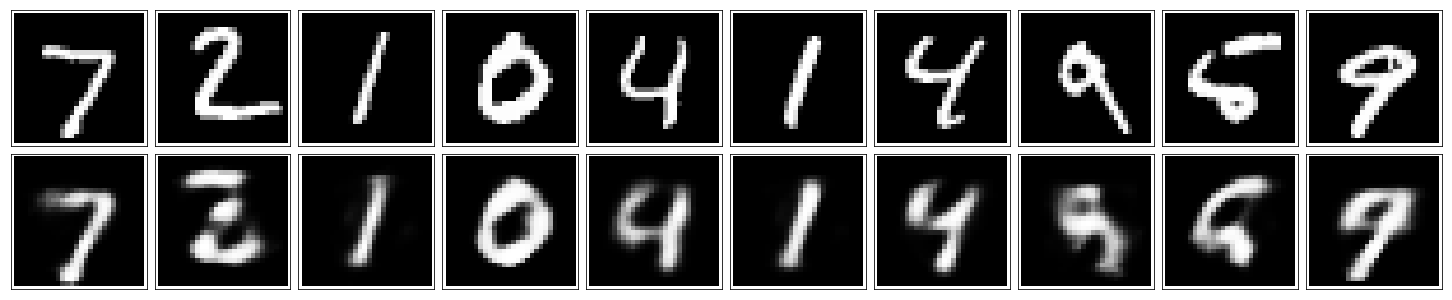

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

print('compressed:', compressed.shape[1])
print('reconstructed:', reconstructed.shape[1])

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.